In [199]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

In [200]:
df=pd.read_csv(r"C:\Users\youssef azam\Downloads\carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [201]:
df.shape

(13, 4)

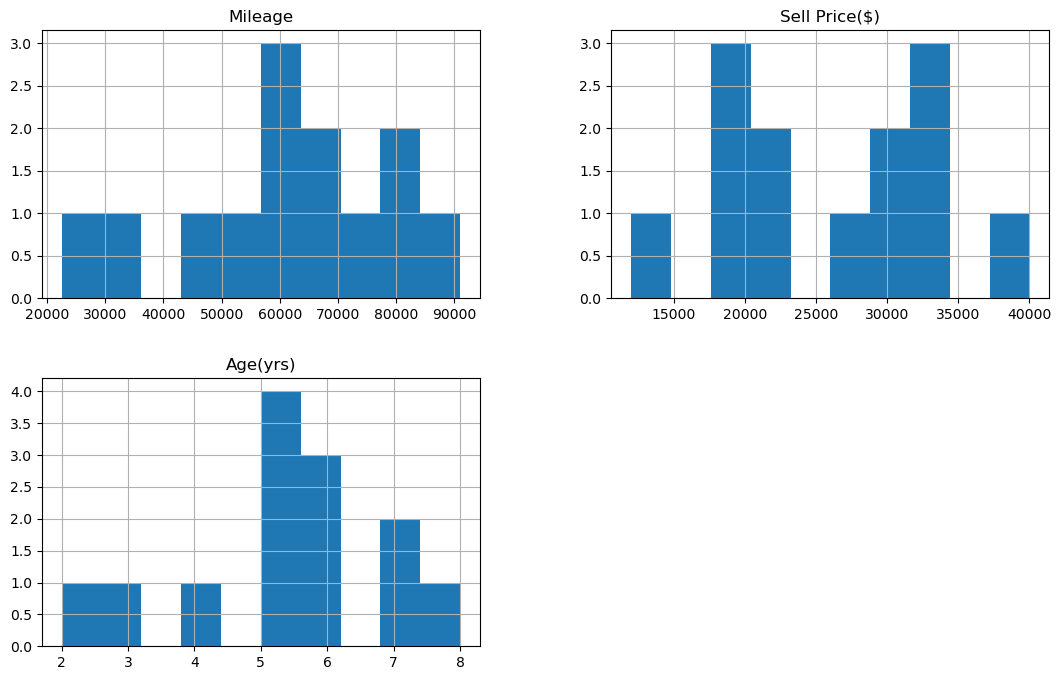

In [202]:
df.hist(figsize=(13,8))
plt.show()

In [178]:
df.nunique()

Car Model         3
Mileage          12
Sell Price($)    13
Age(yrs)          7
dtype: int64

# One-hot encoding
import numpy as np
from sklearn.preprocessing import OneHotEncoder
y=df
# onehot_encoder = OneHotEncoder(categories='auto', sparse=False)
X_train_onehot = onehot_encoder.fit_transform(y)
# print(X_train_onehot)

LabelEncoder()
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()
y=df['Car Model']
# Encode the data
encoded_data = encoder.fit_transform(y)

# Print the encoded data
print(encoded_data)


In [179]:
df=pd.get_dummies(df)

In [180]:
df.head()

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0


In [181]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the features and the target variable
features = df[['Mileage', 'Age(yrs)', 'Car Model_Audi A5', 'Car Model_BMW X5', 'Car Model_Mercedez Benz C class']]
target = df[['Sell Price($)']]

In [182]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=11)

In [183]:
# Choose a model
model = LinearRegression()

In [184]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [185]:
# Evaluate the model
score = model.score(X_test, y_test)
print(score)

0.8781496897941118


In [186]:
# Make predictions
predictions = model.predict(X_test)
predictions

array([[25651.26109295],
       [41713.52171882],
       [ 9271.06492293]])

In [187]:
model.predict([[9900,3,1,0,0]])

array([[33285.21718823]])

In [188]:
from sklearn.model_selection import cross_val_score
# Evaluate the model using cross-validation
scores = cross_val_score(model, features, target, cv=5)

# Print the scores
print(scores)

[  0.95838767   0.8636328    0.67087198 -18.33800887   0.66787517]


Text(0, 0.5, 'Actual Values')

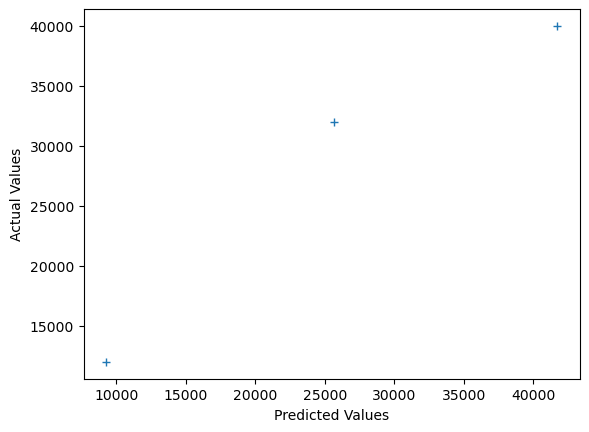

In [192]:
# Plot the predicted values and the actual values
plt.plot(predictions.ravel(), y_test, '+')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')